In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_excel('Семинар 7 Данные для моделирования Логит, Пробит.xlsx')

In [4]:
df_new = df[['Статус','Регион регистрации',
              '2017, Рентабельность капитала (ROE), %', 
              '2018, Рентабельность капитала (ROE), %',
              '2019, Рентабельность капитала (ROE), %',
              '2020, Рентабельность капитала (ROE), %',
              '2017, Рентабельность продаж, %',
              '2018, Рентабельность продаж, %',
              '2019, Рентабельность продаж, %',
              '2020, Рентабельность продаж, %',
              '2017, Рентабельность активов (ROA), %',
              '2018, Рентабельность активов (ROA), %',
              '2019, Рентабельность активов (ROA), %',
              '2020, Рентабельность активов (ROA), %',
              '2017, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2018, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2019, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2020, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2017, Коэффициент текущей ликвидности, %',
              '2018, Коэффициент текущей ликвидности, %',
              '2019, Коэффициент текущей ликвидности, %',
              '2020, Коэффициент текущей ликвидности, %',
              '2017, Коэффициент быстрой ликвидности, %',
              '2018, Коэффициент быстрой ликвидности, %',
              '2019, Коэффициент быстрой ликвидности, %',
             '2020, Коэффициент быстрой ликвидности, %',
             '2017, Коэффициент абсолютной ликвидности, %',
             '2018, Коэффициент абсолютной ликвидности, %',
             '2019, Коэффициент абсолютной ликвидности, %',
             '2020, Коэффициент абсолютной ликвидности, %',
             '2017, Коэффициент оборачиваемости совокупных активов, %',
             '2018, Коэффициент оборачиваемости совокупных активов, %',
             '2019, Коэффициент оборачиваемости совокупных активов, %',
             '2020, Коэффициент оборачиваемости совокупных активов, %',
             'Отрасль', 'Округ']]

In [5]:
df_new = df_new.loc[df_new['Регион регистрации']=='Нижегородская область']
df_new.index = [i for i in range(df_new.shape[0]) ]

In [6]:
df_new.drop('Регион регистрации', inplace=True, axis=1)

In [59]:
df_new['Статус'].value_counts()

0    184
1      5
Name: Статус, dtype: int64

In [8]:
#преобразуем категориальные данные
for i in range(df_new.shape[0]):
    if df_new['Округ'].loc[i] == 'Приволжский ФО':
        df_new['Округ'].loc[i] = 0
    elif df_new['Округ'].loc[i] == 'Центральный ФО':
        df_new['Округ'].loc[i] = 1
    elif df_new['Округ'].loc[i] == 'Сибирский ФО':
        df_new['Округ'].loc[i] = 2  
    elif df_new['Округ'].loc[i] == 'Северно-Западный ФО':
        df_new['Округ'].loc[i] = 3  
    elif df_new['Округ'].loc[i] == 'Уральский ФО':
        df_new['Округ'].loc[i] = 4  
    else:
        df_new['Округ'].loc[i] = 5

C:\Users\user\AppData\Local\Temp\ipykernel_11880\2875032908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Округ'].loc[i] = 0


In [9]:
for i in range(df_new.shape[0]):
    if df_new['Отрасль'].loc[i] == 'Животноводство':
        df_new['Отрасль'][i] = 0
    elif df_new['Отрасль'].loc[i] == 'Растениеводство':
        df_new['Отрасль'][i] = 1
    else:
        df_new['Отрасль'][i] = 2

C:\Users\user\AppData\Local\Temp\ipykernel_11880\3068095241.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Отрасль'][i] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_11880\3068095241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Отрасль'][i] = 2
C:\Users\user\AppData\Local\Temp\ipykernel_11880\3068095241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Отрасль'][i] = 0


In [10]:
df_new.isna().sum()

Статус                                                                     0
2017, Рентабельность капитала (ROE), %                                    13
2018, Рентабельность капитала (ROE), %                                    15
2019, Рентабельность капитала (ROE), %                                     3
2020, Рентабельность капитала (ROE), %                                     1
2017, Рентабельность продаж, %                                             9
2018, Рентабельность продаж, %                                             3
2019, Рентабельность продаж, %                                             1
2020, Рентабельность продаж, %                                             0
2017, Рентабельность активов (ROA), %                                     13
2018, Рентабельность активов (ROA), %                                     16
2019, Рентабельность активов (ROA), %                                      3
2020, Рентабельность активов (ROA), %                                      1

In [11]:
#Заменим пропущенные значения на среднее 
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Поместим вмененное значение в набор данных
mean_imputer = mean_imputer.fit(df_new)

results = mean_imputer.transform(df_new.values)
results.round()

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  2.,  0.],
       ...,
       [ 0.,  0., -0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  2.,  0.]])

In [12]:
df_ = pd.DataFrame(results, columns=['Статус',
              '2017, Рентабельность капитала (ROE), %', 
              '2018, Рентабельность капитала (ROE), %',
              '2019, Рентабельность капитала (ROE), %',
              '2020, Рентабельность капитала (ROE), %',
              '2017, Рентабельность продаж, %',
              '2018, Рентабельность продаж, %',
              '2019, Рентабельность продаж, %',
              '2020, Рентабельность продаж, %',
              '2017, Рентабельность активов (ROA), %',
              '2018, Рентабельность активов (ROA), %',
              '2019, Рентабельность активов (ROA), %',
              '2020, Рентабельность активов (ROA), %',
              '2017, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2018, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2019, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2020, Коэффициент обеспеченности собственными оборотными средствами, %',
              '2017, Коэффициент текущей ликвидности, %',
              '2018, Коэффициент текущей ликвидности, %',
              '2019, Коэффициент текущей ликвидности, %',
              '2020, Коэффициент текущей ликвидности, %',
              '2017, Коэффициент быстрой ликвидности, %',
              '2018, Коэффициент быстрой ликвидности, %',
              '2019, Коэффициент быстрой ликвидности, %',
             '2020, Коэффициент быстрой ликвидности, %',
             '2017, Коэффициент абсолютной ликвидности, %',
             '2018, Коэффициент абсолютной ликвидности, %',
             '2019, Коэффициент абсолютной ликвидности, %',
             '2020, Коэффициент абсолютной ликвидности, %',
             '2017, Коэффициент оборачиваемости совокупных активов, %',
             '2018, Коэффициент оборачиваемости совокупных активов, %',
             '2019, Коэффициент оборачиваемости совокупных активов, %',
             '2020, Коэффициент оборачиваемости совокупных активов, %',
             'Отрасль', 'Округ'])

In [13]:
df_.isna().sum()

Статус                                                                    0
2017, Рентабельность капитала (ROE), %                                    0
2018, Рентабельность капитала (ROE), %                                    0
2019, Рентабельность капитала (ROE), %                                    0
2020, Рентабельность капитала (ROE), %                                    0
2017, Рентабельность продаж, %                                            0
2018, Рентабельность продаж, %                                            0
2019, Рентабельность продаж, %                                            0
2020, Рентабельность продаж, %                                            0
2017, Рентабельность активов (ROA), %                                     0
2018, Рентабельность активов (ROA), %                                     0
2019, Рентабельность активов (ROA), %                                     0
2020, Рентабельность активов (ROA), %                                     0
2017, Коэффи

In [15]:
X = df_.loc[:, df_.columns != 'Статус']
y = df_.loc[:, df_.columns == 'Статус']

from imblearn.over_sampling import SMOTE
os = SMOTE(k_neighbors = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Статус'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Статус']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Статус']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Статус']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Статус']==1])/len(os_data_X))

length of oversampled data is  258
Number of no subscription in oversampled data 129
Number of subscription 129
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [16]:
data_final_vars=df_.columns.values.tolist()
y=['Статус']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False False  True  True False False  True
 False  True  True False  True  True  True False False  True False False
 False False False False False  True  True  True  True False]
[ 1  1  1  1  3 14 17  1  1  9 11  1  6  1  1  8  1  1  1 13  4  1 15  2
 12  5 16 10  7  1  1  1  1 18]


In [17]:
val  = [ True,  True,  True,  True, False, False, False,  True,  True, False, False,  True,
 False,  True,  True, False,  True,  True,  True, False, False,  True, False, False,
 False, False, False, False, False,  True,  True,  True , True, False]
res = [i for i, x in enumerate(val) if x]

In [35]:
[list(os_data_X.columns.values)[i] for i in res]

['2017, Рентабельность капитала (ROE), %',
 '2018, Рентабельность капитала (ROE), %',
 '2019, Рентабельность капитала (ROE), %',
 '2020, Рентабельность капитала (ROE), %',
 '2020, Рентабельность продаж, %',
 '2017, Рентабельность активов (ROA), %',
 '2020, Рентабельность активов (ROA), %',
 '2018, Коэффициент обеспеченности собственными оборотными средствами, %',
 '2019, Коэффициент обеспеченности собственными оборотными средствами, %',
 '2017, Коэффициент текущей ликвидности, %',
 '2018, Коэффициент текущей ликвидности, %',
 '2019, Коэффициент текущей ликвидности, %',
 '2018, Коэффициент быстрой ликвидности, %',
 '2018, Коэффициент оборачиваемости совокупных активов, %',
 '2019, Коэффициент оборачиваемости совокупных активов, %',
 '2020, Коэффициент оборачиваемости совокупных активов, %',
 'Отрасль']

In [37]:
d = os_data_X.drop(['2017, Рентабельность продаж, %',
                '2018, Рентабельность продаж, %',
                '2019, Рентабельность продаж, %',
                '2020, Рентабельность продаж, %',
               '2017, Коэффициент быстрой ликвидности, %',
               '2018, Коэффициент быстрой ликвидности, %',
               '2019, Коэффициент быстрой ликвидности, %',
               '2020, Коэффициент быстрой ликвидности, %',
               'Округ'],  axis=1)

y = os_data_y['Статус']

In [41]:
d['Статус'] = y

In [43]:
df_2017 = pd.DataFrame()
df_2018 = pd.DataFrame()
df_2019 = pd.DataFrame()
df_2020 = pd.DataFrame()
for i in d.columns:
    if '2017' in i:
        df_2017[i] = df_[i]
    if 'Статус' in i:
        df_2017[i] = df_[i] 
    if 'Отрасль' in i:
        df_2017[i] = df_[i]
    if 'Округ' in i:
        df_2017[i] = df_[i]
    if '2018' in i:
        df_2018[i] = df_[i]
    if 'Статус' in i:
        df_2018[i] = df_[i]
    if 'Отрасль' in i:
        df_2018[i] = df_[i]
    if 'Округ' in i:
        df_2018[i] = df_[i]
    if '2019' in i:
        df_2019[i] = df_[i]
    if 'Статус' in i:
        df_2019[i] = df_[i]
    if 'Отрасль' in i:
        df_2019[i] = df_[i]
    if 'Округ' in i:
        df_2019[i] = df_[i]
    if '2020' in i:
        df_2020[i] = df_[i]
    if 'Статус' in i:
        df_2020[i] = df_[i]
    if 'Отрасль' in i:
        df_2020[i] = df_[i]
    if 'Округ' in i:
        df_2020[i] = df_[i]

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['variable'] = X_train.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,1.037305,"2018, Рентабельность капитала (ROE), %"
1,1.672549,"2018, Рентабельность активов (ROA), %"
2,1.324127,"2018, Коэффициент обеспеченности собственными ..."
3,76.997852,"2018, Коэффициент текущей ликвидности, %"
4,76.516894,"2018, Коэффициент абсолютной ликвидности, %"
5,1.865648,"2018, Коэффициент оборачиваемости совокупных а..."
6,1.518990,Отрасль


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(df_2017.drop(['Статус'], axis= 1),df_2017['Статус'], test_size=0.3, random_state=0)
X = sm.tools.tools.add_constant(X_train)
model = Logit(Y_train, X.astype(float))
logit_model = model.fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.049681
         Iterations 16


C:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Статус   No. Observations:                  132
Model:                          Logit   Df Residuals:                      124
Method:                           MLE   Df Model:                            7
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.5420
Time:                        23:26:05   Log-Likelihood:                -6.5579
converged:                       True   LL-Null:                       -14.318
Covariance Type:            nonrobust   LLR p-value:                   0.02988
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      4.2876      3.405      1.259      0.208      -2.387      10.962
2017, Рентабельность капитала (ROE), %                                    -1.2258      1.790     -0.685      0.493      -4.734       2.282
2017, Рентабельность активов (ROA), %                                     10.9014     15.004      0.727      0.467     -18.506      40.309
2017, Коэффициент обеспеченности собственными оборотными средствами, %    -0.1607      0.636     -0.253      0.801      -1.407       1.086
2017, Коэффициент текущей ликвидности, %                                  -6.7084      3.465     -1.936      0.053     -13.500       0.083
2017, Коэффициент абсолютной ликвидности, %                               15.6557     10.860      1.442      0.149      -5.629      36.940
2017, Коэффициент оборачиваемости совокупных активов, %                   -2.6788      3.187     -0.840      0.401      -8.926       3.568
Отрасль                                                                   -3.1555      2.576     -1.225      0.221      -8.204       1.893
==========================================================================================================================================

Possibly complete quasi-separation: A fraction 0.70 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df_2018.drop(['Статус'], axis= 1), df_2018['Статус'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [82]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[55  0]
 [ 2  0]]


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        55
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        57
   macro avg       0.48      0.50      0.49        57
weighted avg       0.93      0.96      0.95        57



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


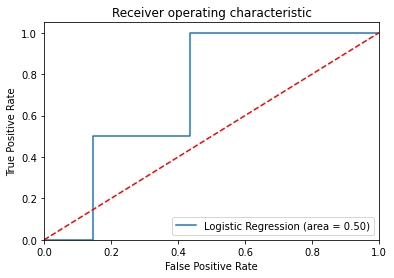

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [201]:
pred_test = logit_model.predict(np.array(np.hstack((np.ones([X_test.shape[0],1]),X_test))).astype(float)).reshape(-1,1)

In [202]:
pred_test

array([[3.17297377e-013],
       [1.75007106e-002],
       [9.61521457e-005],
       [4.45625702e-011],
       [1.09905390e-004],
       [3.92121783e-026],
       [9.88498079e-011],
       [3.25063828e-044],
       [4.41815231e-013],
       [1.08136101e-004],
       [4.14668187e-035],
       [1.01506024e-025],
       [8.87171542e-010],
       [1.11769488e-006],
       [8.13128981e-007],
       [1.00536698e-005],
       [9.15674165e-127],
       [5.84756731e-003],
       [1.26206312e-002],
       [4.06196992e-004],
       [4.89693047e-086],
       [1.93335832e-011],
       [2.92779216e-002],
       [2.29532124e-002],
       [5.15927253e-002],
       [4.06718795e-005],
       [1.72971818e-093],
       [3.37898370e-019],
       [1.58226256e-005],
       [1.01529453e-034],
       [2.45511250e-013],
       [1.16984248e-001],
       [4.29955057e-003],
       [9.34192891e-084],
       [2.04481764e-023],
       [2.38181593e-024],
       [7.52314399e-039],
       [6.26324098e-010],
       [6.44

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(df_2018.drop(['Статус','2018, Коэффициент текущей ликвидности, %' ], axis= 1),df_2018['Статус'], test_size=0.3, random_state=0)
X = sm.tools.tools.add_constant(X_train)
model = Logit(Y_train, X.astype(float))
logit_model = model.fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.080347
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Статус   No. Observations:                  132
Model:                          Logit   Df Residuals:                      125
Method:                           MLE   Df Model:                            6
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.2593
Time:                        23:26:12   Log-Likelihood:                -10.606
converged:                       True   LL-Null:                       -14.318
Covariance Type:            nonrobust   LLR p-value:                    0.2833
==========================================================================================================================================
                                                                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     -2.4383      1.508     -1.617      0.106      -5.395       0.518
2018, Рентабельность капитала (ROE), %                                    -0.0054      0.155     -0.035      0.972      -0.310       0.299
2018, Рентабельность активов (ROA), %                                    -19.8310     10.467     -1.895      0.058     -40.345       0.683
2018, Коэффициент обеспеченности собственными оборотными средствами, %     0.3982      0.259      1.539      0.124      -0.109       0.905
2018, Коэффициент абсолютной ликвидности, %                                0.0079      0.020      0.395      0.693      -0.031       0.047
2018, Коэффициент оборачиваемости совокупных активов, %                   -2.1734      3.738     -0.581      0.561      -9.500       5.153
Отрасль                                                                   -1.3330      1.474     -0.904      0.366      -4.222       1.556
==========================================================================================================================================
"""

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df_2020.drop(['Статус'], axis= 1), df_2020['Статус'], test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [110]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[55  0]
 [ 2  0]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        55
         1.0       0.00      0.00      0.00         2

    accuracy                           0.96        57
   macro avg       0.48      0.50      0.49        57
weighted avg       0.93      0.96      0.95        57



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


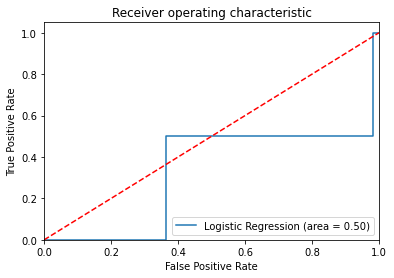

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()